<a href="https://colab.research.google.com/github/AbhijeetKD20/Guvi-Assignments/blob/main/Guvi_Decision_Trees_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
dataset = pd.read_csv("auto-mpg.csv")
dataset.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


**mpg** = miles per gallon

In [ ]:
#cleaning
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
dataset.describe() #To check for outliers

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Here **"horsepower"** col is not showing because it has been interpret as **str(object)** by pandas.

In [ ]:
#checking dtypes
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
#checking the unique values in horsepower col
dataset.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

As we can see there is a question mark in the horsepower col. We'll just simply remove that str from  our dataset

In [ ]:
#Considering all the rows of horsepower col except the one with a question mark
dataset = dataset.loc[dataset.horsepower != "?",:]
dataset.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
#converting str into int dtypes
dataset.horsepower = dataset.horsepower.astype("int")
dataset.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#drop "car name" col
dataset = dataset.drop(["car name"], axis = 1)

In [ ]:
#defining the variables
# X = dataset.iloc[:, 1:].values
# y = dataset.iloc[:, 1].values


In [ ]:
# #other way to define the variables
X = dataset.drop("mpg", axis = "columns")
y = dataset["mpg"]


In [ ]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
#Scaling is not mandatory for D.Ts, but it is always good
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test) 

## **Decision Tree Regressor**

In [ ]:
#Decision Tree Regressor Implementation
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)    #fitting into my training set

DecisionTreeRegressor()

In [ ]:
#prediction
y_pred = regressor.predict(X_test)
y_pred

array([29. , 26.4, 13. , 37.3, 46.6, 19. , 37. , 27.2, 19. , 28. , 29.5,
       16. , 23.2, 14. , 15.5, 33. , 23.2, 15. , 29. , 28. , 18.1, 16. ,
       21. , 24.2, 33. , 13. , 27. , 23.2, 19. , 15. , 17. , 36.4, 20. ,
       29. , 18. , 28. , 35. , 14. , 17.5, 15. , 13. , 29.8, 36.4, 14. ,
       29. , 15.5, 27.2, 14. , 19.4, 18. , 28. , 14. ,  9. , 21. , 32.2,
       24.2, 19.1, 17.5, 33. , 23. , 18. , 29. , 36.1, 16. , 28. , 17. ,
       15. , 28. , 20. , 46.6, 36.1, 29.5, 17. , 15.5, 18. , 14. , 29. ,
       19.4, 30. , 30. , 20.5, 34.5, 22.5, 28. , 16. , 26.6, 24. , 37. ,
       37. , 28. , 23.2, 14. , 27.5, 18. , 19.1, 24. , 39.1, 22. , 33. ,
       36.1, 12. , 28. , 21. , 27.5, 37.3, 32.7, 25. , 17. , 44.3, 14. ,
       16. , 29.5, 26. , 22.4, 27. , 24. , 24.3, 20.5])

## **Evaluation Metric**

In [ ]:
from sklearn.metrics import r2_score
R2_score = r2_score(y_test, y_pred)

#print rmse_regressor
print("Test set R2 of regressor:{:.2f}".format(R2_score))                    

Test set R2 of regressor:0.77


r2_score:

min value = -infinity

max value = +1

baseline no = 0

## **Linear Regression vs DecisionTree Regression**

In [ ]:
#Linear Regression Implementation:
from sklearn.linear_model import LinearRegression
regressor_1 = LinearRegression()
regressor_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
#prediction
y_pred_1 = regressor_1.predict(X_test)
y_pred_1

array([26.07629413, 25.59441524, 10.69635381, 32.16558517, 32.94641582,
       23.15642216, 34.07038267, 25.85709762, 20.42322781, 26.89789614,
       27.40129602, 13.69770331, 25.13660609,  8.86699055, 16.45714875,
       33.0693901 , 25.93290504, 12.78295625, 25.61459423, 26.9765456 ,
       20.45303566, 17.81483353, 23.6380299 , 26.72412284, 31.50776508,
       11.34083931, 28.65815883, 25.80459591, 22.62192047, 14.94372464,
       22.7634725 , 30.87122109, 23.99876368, 28.23938418, 21.65614576,
       29.48918572, 28.53532051, 12.01685358, 14.89920186, 10.14655118,
       13.75995439, 34.42742585, 30.66317461, 13.75306521, 30.557312  ,
       15.23846668, 29.89704094, 10.82632876, 17.39124221, 21.89298119,
       26.76803581, 14.81176707,  8.81066179, 23.11551122, 31.2672024 ,
       26.0062675 , 25.85367264, 20.7135161 , 31.57723807, 24.4002977 ,
       19.1428178 , 27.38505154, 30.98128503, 10.25395507, 25.75398408,
       16.90015638, 10.26357725, 29.01501772, 21.27099244, 33.11

In [ ]:
#Evaluation metric

R2_score_1 = r2_score(y_test, y_pred_1)

#print rmse_regressor_1
print("Linear Regressor test set r2_score:{:.2f}".format(R2_score_1))

Linear Regressor test set r2_score:0.82


In [ ]:
#print rmse_regressor
print("Decision Tree test set r2_score:{:.2f}".format(R2_score))

#print rmse_regressor_1
print("Linear Regression test set r2_score:{:.2f}".format(R2_score_1))

Decision Tree test set r2_score:0.77
Linear Regression test set r2_score:0.82


For this dataset "auto-mpg.csv", LR seems to be more successful than DT.

In [ ]:
#Doing cross_val_score for D.T model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  regressor = DecisionTreeRegressor(max_depth = depth)
  regressor.fit(X_train, y_train)
  train_acc = r2_score(y_train, regressor.predict(X_train))

  #fresh model which is not trained
  regressor_new = DecisionTreeRegressor(max_depth = depth)

  val_acc= cross_val_score(regressor_new, X_train, y_train, cv = 10, scoring = make_scorer(r2_score))
  
  print("Max_depth:", depth, "Training Accuracy:",train_acc, "Validation Accuracy:", np.mean(val_acc))

Max_depth: 1 Training Accuracy: 0.6156762802967006 Validation Accuracy: 0.5890476669669904
Max_depth: 2 Training Accuracy: 0.7500149829649327 Validation Accuracy: 0.637204050782721
Max_depth: 3 Training Accuracy: 0.8528262090089752 Validation Accuracy: 0.7512989895338411
Max_depth: 4 Training Accuracy: 0.907890101311329 Validation Accuracy: 0.8065370728360506
Max_depth: 5 Training Accuracy: 0.946604842194336 Validation Accuracy: 0.7965678272513679
Max_depth: 6 Training Accuracy: 0.9657213574226933 Validation Accuracy: 0.7875588181072456
Max_depth: 7 Training Accuracy: 0.9774970235931869 Validation Accuracy: 0.7671595858356464
Max_depth: 8 Training Accuracy: 0.9865234654574854 Validation Accuracy: 0.7766894682388585
Max_depth: 9 Training Accuracy: 0.9913111514442395 Validation Accuracy: 0.7350687374840519
Max_depth: 10 Training Accuracy: 0.9965956286886741 Validation Accuracy: 0.7751492713301934
Max_depth: 20 Training Accuracy: 1.0 Validation Accuracy: 0.761501521533258
Max_depth: 40 Tr

Getting the best value at max_depth = 4

In [ ]:
#Applying DecisionTeeRegressor(max_depth = 4)
regressor = DecisionTreeRegressor(max_depth = 4)
regressor.fit(X_train, y_train)

#Feature_importances:
importance = regressor.feature_importances_
list(zip(importance, X_test.columns))

[(0.6781396552373975, 'cylinders'),
 (0.0133622473456447, 'displacement'),
 (0.05566192743191056, 'horsepower'),
 (0.1149186358233479, 'weight'),
 (0.014087530260596597, 'acceleration'),
 (0.1238300039011028, 'model year'),
 (0.0, 'origin')]

<BarContainer object of 7 artists>

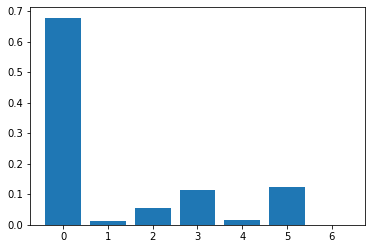

In [ ]:
plt.bar([x for x in range(len(importance))], importance)